# Coding Two - 21033106
## Final Project

#### Image Style Transfer with Custom 3D Artwork

Generate 3D Artwork with NumPy:
Use NumPy to create a custom 3D artwork with a user-defined shape, size, and set of parameters.

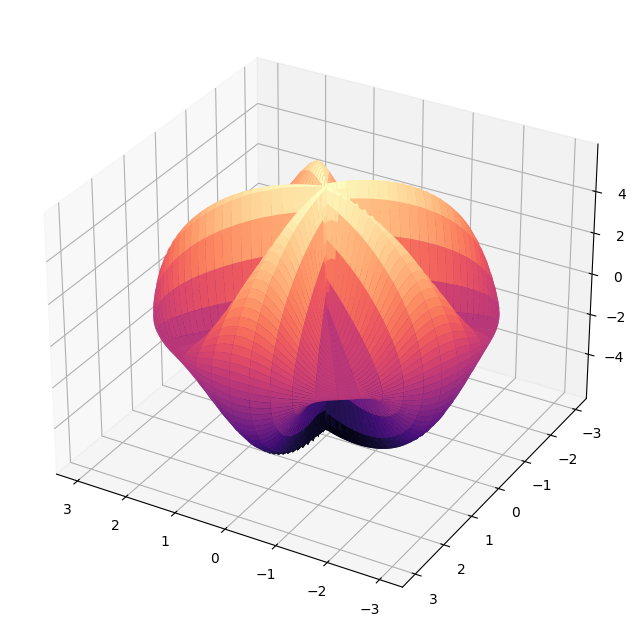

<Figure size 640x480 with 0 Axes>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define flower parameters
r = 3  # radius of flower
n = 100  # number of points in each direction
theta = np.linspace(0, 2 * np.pi, n)
phi = np.linspace(0, np.pi, n)
theta, phi = np.meshgrid(theta, phi)

# Define 3D coordinates for each point
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi) * (1 + np.sin(5 * theta))

# Plot flower
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=120)
ax.plot_surface(x, y, z, cmap='magma')
plt.show()

**Sorry for could not solve this problem: save and define the output directly as a file (in the code, not locally), so that the conversion style can be called directly without using the file path.**

**It can be saved, but there is a blank image.**

Another model

Code from course of Creative Computing Institute - Coding Two - style_transfer.ipynb

Fast Style Transfer with TensorFlow:
Use TensorFlow to apply the style of the image to the 3D artwork.

In [55]:
import os
import tensorflow as tf
import IPython.display as display
import matplotlib as mpl
import PIL.Image
import time
import functools
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

In [56]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [57]:
import numpy as np
import PIL

def tensor_to_image(tensor):
    # Scale the tensor values to the range [0, 255]
    tensor = tensor*255
    
    # Convert the tensor to a numpy array with dtype uint8
    tensor = np.array(tensor, dtype=np.uint8)
    
    # Check if the tensor has more than 3 dimensions, and if so, make sure the first dimension is 1
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    
    # Convert the numpy array to a PIL Image
    return PIL.Image.fromarray(tensor)


In [67]:
#content_path ='flower.jpg'
content_path ='MSc-Coding-2/Project/flower.jpg'
style_path = 'MSc-Coding-2/Project/style.jpg'

def load_img(path_to_img):
  # Define the maximum dimension of the image to resize it to.
  max_dim = 512

  # Read the image from the specified file path.
  img = tf.io.read_file(path_to_img)

  # Decode the image and convert it to float32 data type.
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Determine the current shape of the image and calculate the scaling factor
  # to resize it while preserving aspect ratio.
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  # Resize the image and add a batch dimension to it.
  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]

  # Return the resized image with a batch dimension.
  return img

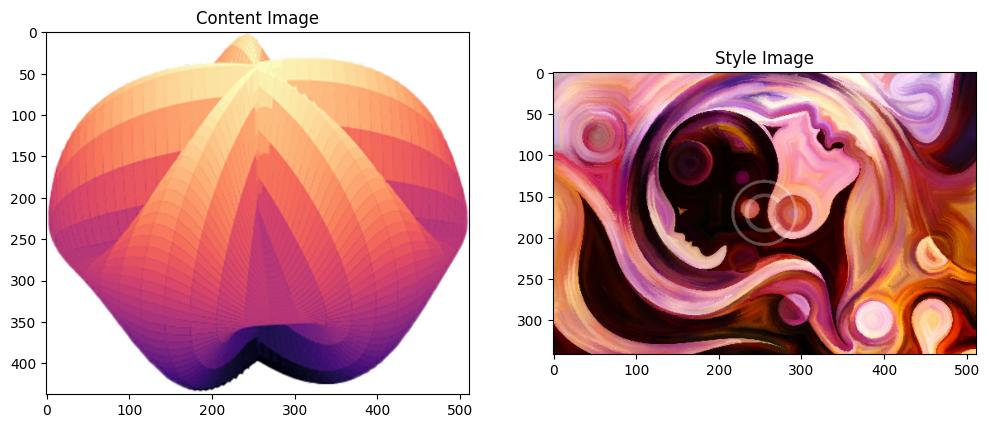

In [71]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
# Load the content image using the load_img function
content_image = load_img(content_path)

# Load the style image using the load_img function
style_image = load_img(style_path)

# Display the content and style images side-by-side
# in a single figure with subplots
plt.subplot(1, 2, 1)
# Display the content image with a title
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
# Display the style image with a title
imshow(style_image, 'Style Image')

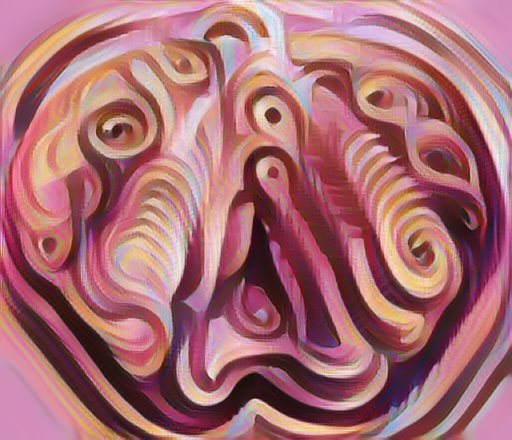

In [69]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

---
---
---
---

Image Classification with TensorFlow:
Use TensorFlow to classify images into different categories based on their content.

**Try the classification function but not useful to this project**

Code from CSDN and error fixed by GPT